# The main goal of this notebook is to explore how being branded affects rejected and patient pay. We do this through a logit regression of rejected on branded and a simple linear regression of patient pay on branded.

In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#read the file 
data= pd.read_csv('pharmacy_tx.csv') 
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [3]:
drugsplit=data['drug'].str.split(" ",n=1,expand=True)

In [85]:
data['Type']=drugsplit[0]
data['Drug']=drugsplit[1]
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,branded,True Rejected
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol,1,0
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted,1,0
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol,1,0
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted,0,0
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene,1,1
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin,0,0
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol,0,0
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib,1,0


In [86]:
y= data['rejected']
x= data['Type']

In [87]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: rejected, dtype: bool

# Logistic

#### We create a logistic regression of type(branded/generic) on whether the drug is rejected. We think that being branded has an effect on the drug being rejected by insurance

In [88]:
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,branded,True Rejected
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol,1,0
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted,1,0
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol,1,0
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted,0,0
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene,1,1
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin,0,0
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol,0,0
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib,1,0


In [89]:
#Splitting type into a binary variable. 1 if branded 0 if generic. 
pd.get_dummies(data['Type'])
data.loc[:,'branded'] = pd.get_dummies(data['Type'])['branded'].copy()

In [90]:
#Splitting rejected into a binary variable. 1 if rejected 0 if accepted. 
pd.get_dummies(data['rejected'])
data.loc[:,"True Rejected"] = pd.get_dummies(data['rejected'])[True].copy()

In [91]:
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,branded,True Rejected
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol,1,0
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted,1,0
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol,1,0
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted,0,0
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene,1,1
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin,0,0
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol,0,0
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib,1,0


In [92]:
X= data[['branded']]
y= data['True Rejected']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                #       shuffle=True,
                                                 #      random_state=435,
                                                  #     test_size=.2,
                                                   #    stratify=y)

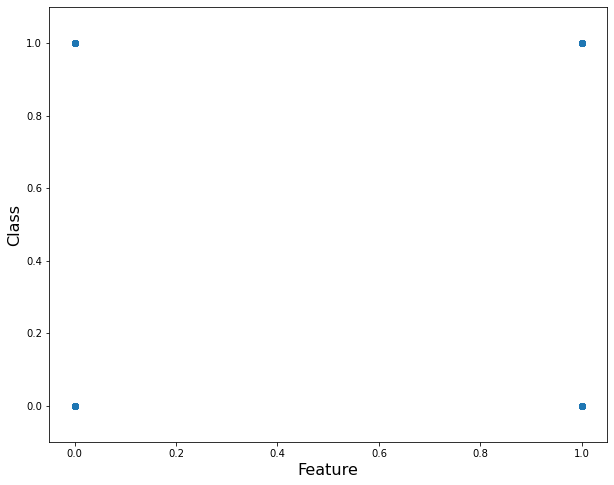

In [95]:
plt.figure(figsize = (10,8))

plt.scatter(X,y)
plt.ylim((-.1,1.1))
plt.xlabel("Feature",fontsize = 16)
plt.ylabel("Class",fontsize = 16)

plt.show()

In [96]:
#as expected we have 4 categories

In [97]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [98]:
## make model object
log_reg = LogisticRegression()

## fit the model
log_reg.fit(X, y)

LogisticRegression()

In [99]:
## Demonstrate predict
y_pred=log_reg.predict(X)

In [100]:
## Demonstrate predict_proba
log_reg.predict_proba(X)

array([[0.87831431, 0.12168569],
       [0.87831431, 0.12168569],
       [0.87831431, 0.12168569],
       ...,
       [0.99546008, 0.00453992],
       [0.87831431, 0.12168569],
       [0.87831431, 0.12168569]])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

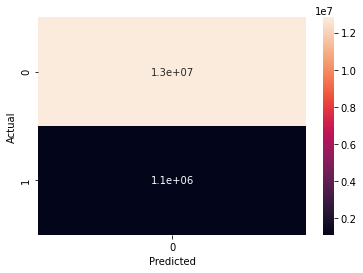

In [105]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [106]:
from sklearn import metrics

In [107]:
print('Accuracy: ',metrics.accuracy_score(y, y_pred))
plt.show()

Accuracy:  0.9218662160059881


In [108]:
#Being branded increases the likelihood of being 
log_reg.coef_

array([[3.41373347]])

In [109]:
np.round(np.exp(1*log_reg.coef_[0][0]),2)

30.38

In [110]:
#Getting branded medicine increases the probability of getting rejected by 30.38

# Regress Branded and Generic on Prices

#### We want to see the effect of branded on patient pay. A good first metric is to use simple linear regression. 

In [27]:
#import linear regression 
from sklearn.linear_model import LinearRegression

In [28]:
data

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay,Type,Drug,branded,True Rejected
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39,branded,tanoclolol,1,0
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02,branded,oxasoted,1,0
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39,branded,cupitelol,1,0
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84,generic,oxasoted,0,0
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00,branded,mamate,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00,branded,colifunene,1,1
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28,generic,tafistitrisin,0,0
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94,generic,tanoclolol,0,0
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93,branded,prazinib,1,0


In [62]:
X= data[['branded']]
y= data['patient_pay']

In [75]:
#Now we define our X_train
X = np.ones((len(data), 2))
X[:,1:] = data[['branded']].values
y_train = data.patient_pay.values

In [76]:
y_train

array([13.39,  7.02, 13.39, ...,  6.94, 13.93, 12.22])

In [77]:
## Make the model object
## notice we have to us fit_intercept = False
## because X_train has a column of 1s
reg = LinearRegression(copy_X=True, fit_intercept=False)

## Fit the model object
## note I do NOT have to use reshape here
## because X_train is a 2D np.array
est=reg.fit(X, y)

In [78]:
## look at coef
reg.coef_

array([11.46287008, 20.05272263])

This shows that when branded, a drug has a copay $20.04 higher than generic.

In [82]:
## Make a prediction
y_pred_sklearn = reg.predict(X)
y_pred_sklearn

array([31.51559271, 31.51559271, 31.51559271, ..., 11.46287008,
       31.51559271, 31.51559271])

In [83]:
## calculate the mse
print("the mse is", np.sum(np.power(y-y_pred_sklearn, 2))/len(y_train))

the mse is 1468.2986130312474


In [84]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_sklearn)
#model explains 0.06439729444890196 of effect

0.06011770224813251